## Text Processing

In [1]:
import pandas as pd
import numpy as np
import string 
string.punctuation
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

Importing my data 

In [2]:
text = pd.read_csv("dfht_25-11_13-02.csv")

In [3]:
text.head()

,Unnamed: 0,Unnamed: 0.1,text,name,year,departure,arrival,theme,latitude,longitude,...,url,arrival_1,arrival_2,arrival_3,theme_1,theme_2,date_slavery_from,date_slavery_to,bought_sold_for,any_money_mention
0,0,0,My name is Vi. And I am 28 years old. I arrive...,Vi,2001.0,Vietnam,American Samoa,Forced labour,-14.354000,-170.773600,...,http://antislavery.ac.uk/items/show/7,American Samoa,NaN,NaN,Forced labour,NaN,NaN,NaN,[],"[('408', '$'), ('4000', '$'), ('2000', '$'), (..."
1,1,1,Thank you for the opportunity to testify befor...,Beatrice,2005.0,Sri Lank,Lebanon,Domestic slavery,33.900000,35.500000,...,http://antislavery.ac.uk/items/show/8,Lebanon,NaN,NaN,Domestic slavery,NaN,NaN,NaN,[],[]
2,2,2,My sister and I were living in a village. We w...,Kavita,2004.0,Sri Lank,India,Domestic slavery,24.071318,79.652396,...,http://antislavery.ac.uk/items/show/102,India,NaN,NaN,Domestic slavery,NaN,2002.0,2004.0,[],[]
3,3,3,I grew up in a village of between 500 and 700 ...,Maria,2005.0,Mexico,United States,Domestic slavery,40.412044,-96.870925,...,http://antislavery.ac.uk/items/show/103,United States,NaN,NaN,Domestic slavery,NaN,1976.0,1981.0,[],"[('200', '$')]"
4,4,4,"I was living in a village, Karko, in the Nuba ...",Mende,2003.0,Sudan,"['Sudan ', 'United Kingdom ']",War slavery,16.865226,32.271106,...,http://antislavery.ac.uk/items/show/104,Sudan,United Kingdom,NaN,War slavery,NaN,1994.0,2000.0,[],[]


In [4]:
text.shape

(1358, 100)

In [5]:
import string 

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def punctuation(n):
    for punctuation in string.punctuation:
        n = n.replace(punctuation, '')
    return n

def lowercase(n):
    n = n.lower()
    return n

def remove_numbers(n):
    n = ''.join(word for word in n if not word.isdigit())
    return n

def remove_stopwords(n):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(n) 
    n = [word for word in word_tokens if not word in stop_words]
    return n

def lemmatize(n):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in n]
    n = ' '.join(lemmatized)
    return n


In [7]:
text['clean_text'] = text['text'].map(punctuation)
text['clean_text'] = text['clean_text'].map(lowercase)
text['clean_text'] = text['clean_text'].map(remove_numbers)
text['clean_text'] = text['clean_text'].map(remove_stopwords)
text['clean_text'] = text['clean_text'].map(lemmatize)

## LatentDirichletAllocation model

In [8]:
# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer().fit(text['clean_text'])

# data_vectorized = vectorizer.transform(text['clean_text'])

# lda_model = LatentDirichletAllocation(n_components=10).fit(data_vectorized)

# def print_topics(model, vectorizer):
#     for idx, topic in enumerate(model.components_):
#         print("Topic %d:" % (idx))
#         print([(vectorizer.get_feature_names_out()[i], topic[i])
#                         for i in topic.argsort()[:-10 - 1:-1]])
        

# print_topics(lda_model, vectorizer)

three words that appear always together

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(text['clean_text'])

X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
new = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names())

/Users/paloma/.pyenv/versions/3.8.12/envs/ht_project/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## N-grams

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
tf_idf_vectorizer = CountVectorizer(ngram_range = (3,3))

X = tf_idf_vectorizer.fit_transform(text['clean_text'])

X.toarray()

three_words=pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

In [12]:
# three_words.T.reset_index().groupby('index').sum()

In [13]:
def get_top_3_words(corpus, n=None):
   
    vec = CountVectorizer(ngram_range = (3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
def get_top_4_words(corpus, n=None):
   
    vec = CountVectorizer(ngram_range = (4,4)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
def get_top_5_words(corpus, n=None):
   
    vec = CountVectorizer(ngram_range = (5,5)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
def get_top_6_words(corpus, n=None):
   
    vec = CountVectorizer(ngram_range = (6,6)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [35]:
list_3 = get_top_3_words(text["clean_text"], n=None)

In [36]:
list_4 = get_top_4_words(text["clean_text"], n=None)

In [37]:
list_5 = get_top_5_words(text["clean_text"], n=None)

In [21]:
list_6 = get_top_6_words(text["clean_text"], n=None)
list_6[0][0]

'narrative provided human right watch report'

In [22]:
list_6[0][0]

'narrative provided human right watch report'

In [23]:
len(list_6)

327351

In [26]:
list_6_new = []
for i in range(len(list_6)):
    if list_6[i][1] <= 4:
        list_6_new.append(list_6[i][0])

327045

     |████████████████████████████████| 220 kB 4.3 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_11_0_x86_64.whl size=158480 sha256=07a06797383810c98448c6fae403fdf27f161c3e05334b56d6de4ccbd09a6712
  Stored in directory: /Users/paloma/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [32]:
Three_words_list = ['work want go rest get',
 'want go rest get hell',
 'made feel sad see old',
 'feel sad see old man',
 'sad see old man tired']
Three_words_list_1 = []
i = 0
for element in Three_words_list:
    Three_words_list_1.append(Three_words_list[i].replace(' ', '_'))
    i+=1

In [33]:
Three_words_list_1

['work_want_go_rest_get',
 'want_go_rest_get_hell',
 'made_feel_sad_see_old',
 'feel_sad_see_old_man',
 'sad_see_old_man_tired']

In [42]:
def common_sentences(my_list):
    new_list = []
    for i in range(len(my_list)):
        new_list.append(my_list[i][0])
    return new_list

In [44]:
Warning_signals = {'Three_words':common_sentences(list_3), 'Four_words':common_sentences(list_4), 'Five_words':common_sentences(list_5), 'Six_words':common_sentences(list_6)}

In [46]:
import json
    
with open("Warning_signals.json", "w") as outfile:
    json.dump(Warning_signals, outfile)

In [69]:
list_3

[('human right watch', 167),
 ('original narrative found', 110),
 ('provided human right', 95),
 ('right watch report', 86),
 ('narrative provided human', 80),
 ('name given narrative', 71),
 ('go back home', 54),
 ('narrative provided amnesty', 54),
 ('provided amnesty international', 54),
 ('narrative provided venkatarangaiya', 48),
 ('provided venkatarangaiya foundation', 48),
 ('venkatarangaiya foundation report', 48),
 ('foundation report and', 48),
 ('report and never', 48),
 ('and never lived', 48),
 ('never lived happily', 48),
 ('lived happily ever', 48),
 ('happily ever battle', 48),
 ('ever battle justice', 48),
 ('battle justice go', 48),
 ('justice go voice', 48),
 ('go voice married', 48),
 ('voice married girl', 48),
 ('married girl telangana', 48),
 ('nonprofit organization dedicated', 46),
 ('preventing human trafficking', 46),
 ('told documentary maker', 45),
 ('narrative source youth', 45),
 ('source youth underground', 45),
 ('youth underground nonprofit', 45),
 ('u

In [70]:
important_6 = ['going call police really scared car', 'drugged heroin thing taken forced wear', 'wear sexually provocative clothes forced prostitution', 'say cry said please let go', 'always want go always hit blame', 'report slavery high street forced labour', 'illegally try work could end situation','ten hour work ten hour forced', 'would pay debt time serving men', 'lack attention occurs young people go']
the_6 = []
i = 0
for element in important_6:
    the_6.append(important_6[i].replace(' ', '_'))
    i+=1
important_5 = ['try leave without paying back', 'threaten horrible piled dorm three', 'heard one outside apartment talking', 'guy went make phone call', 'scared day two people disappeared','one sent money arranged come', 'felt like slave moment arrived', 'getting threat paying wage paper','somebody would give ride across', 'small room though unfurnished aside']
the_5 = []
i = 0
for element in important_5:
    the_5.append(important_5[i].replace(' ', '_'))
    i+=1
important_4 = ['could get good job', 'tell anyone happened even', 'husband take good care', 'would send back mother', 'forced sleep many customer', 'raped many time beaten', 'wanted go home said', 'told could make money','tried run away caught', 'exploited engaged sex work']
the_4 = []
i = 0
for element in important_4:
    the_4.append(important_4[i].replace(' ', '_'))    
    i+=1
    
important_3 = ['put gun head','never got money', 'allowed go school', 'never came back', 'go police station', 'told could go', 'engaged sex work', 'lock inside house', 'one day came', 'never lived happily']
the_3 = []
i = 0
for element in important_3:
    the_3.append(important_3[i].replace(' ', '_'))
    i+=1

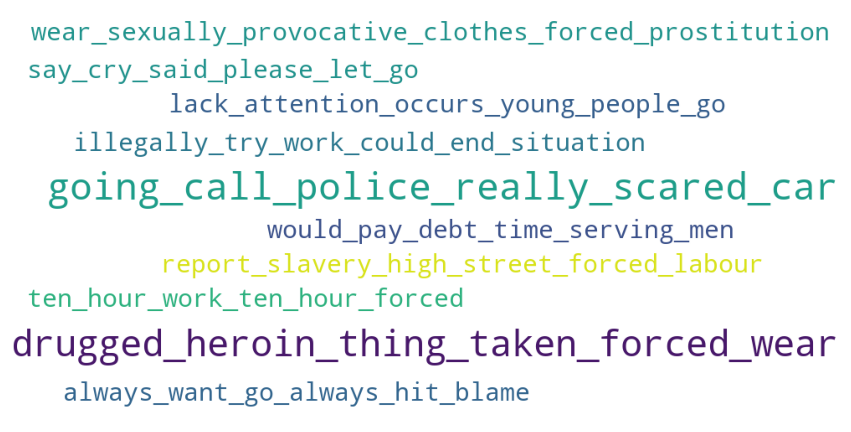

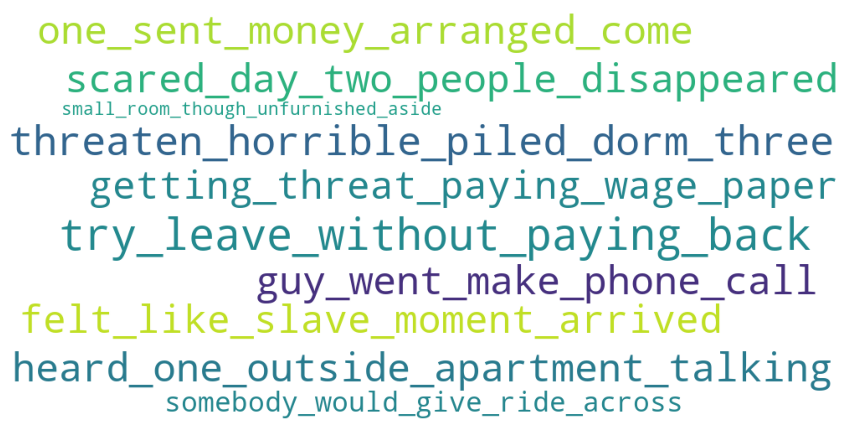

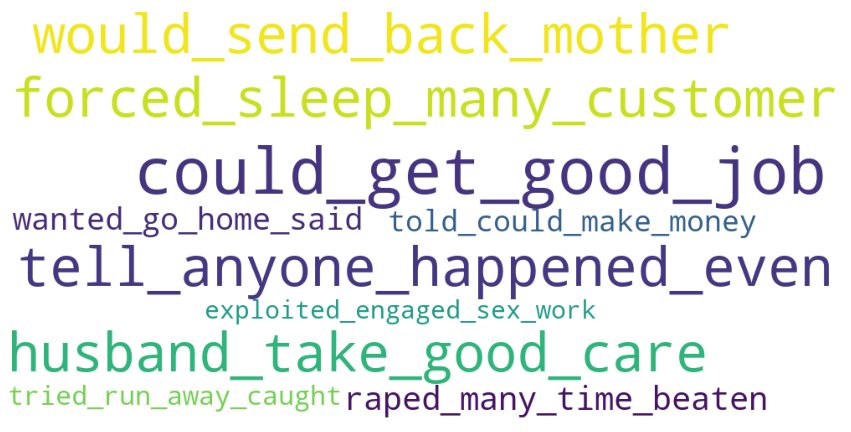

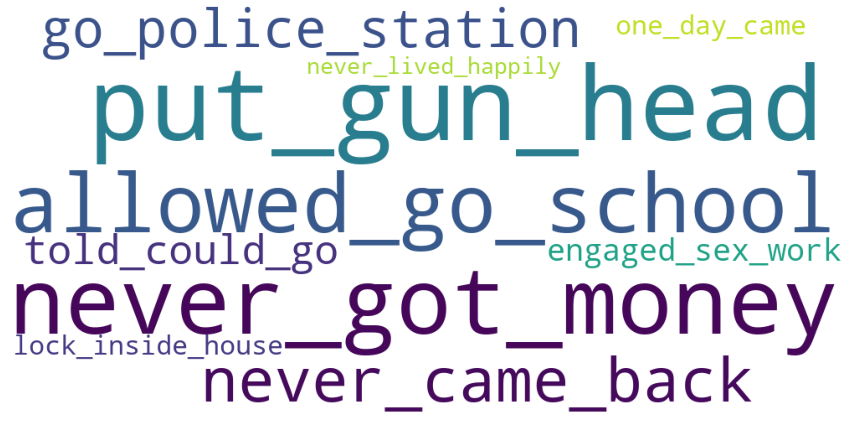

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(the_6)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("the_6"+".png", bbox_inches='tight')
plt.show()
plt.close()

unique_string=(" ").join(the_5)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("the_5"+".png", bbox_inches='tight')
plt.show()
plt.close()

unique_string=(" ").join(the_4)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("the_4"+".png", bbox_inches='tight')
plt.show()
plt.close()

unique_string=(" ").join(the_3)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("the_3"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [115]:
new = []
for element in important_3:
    new.append(element)
for element in important_4:
    new.append(element)
for element in important_5:
    new.append(element)
for element in important_6:
    new.append(element)

In [116]:
new

['put gun head',
 'never got money',
 'allowed go school',
 'never came back',
 'go police station',
 'told could go',
 'engaged sex work',
 'lock inside house',
 'one day came',
 'never lived happily',
 'could get good job',
 'tell anyone happened even',
 'husband take good care',
 'would send back mother',
 'forced sleep many customer',
 'raped many time beaten',
 'wanted go home said',
 'told could make money',
 'tried run away caught',
 'exploited engaged sex work',
 'try leave without paying back',
 'threaten horrible piled dorm three',
 'heard one outside apartment talking',
 'guy went make phone call',
 'scared day two people disappeared',
 'one sent money arranged come',
 'felt like slave moment arrived',
 'getting threat paying wage paper',
 'somebody would give ride across',
 'small room though unfurnished aside',
 'going call police really scared car',
 'drugged heroin thing taken forced wear',
 'wear sexually provocative clothes forced prostitution',
 'say cry said please l

In [117]:
news = ' '.join(new)

In [57]:
new_4 = ' '.join(the_4)
new_4

'could_get_good_job tell_anyone_happened_even husband_take_good_care would_send_back_mother forced_sleep_many_customer raped_many_time_beaten wanted_go_home_said told_could_make_money tried_run_away_caught exploited_engaged_sex_work'

In [80]:
new_6 = ' '.join(important_6)
new_6

'going call police really scared car drugged heroin thing taken forced wear wear sexually provocative clothes forced prostitution say cry said please let go always want go always hit blame report slavery high street forced labour illegally try work could end situation ten hour work ten hour forced would pay debt time serving men lack attention occurs young people go'

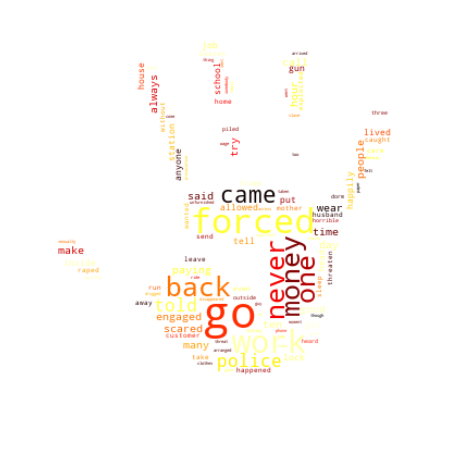

In [151]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image    # to import the image
 
# Create a list of word (https://en.wikipedia.org/wiki/Data_visualization)
text=("Data visualization or data visualisation is viewed by many disciplines as a modern equivalent of visual communication. It involves the creation and study of the visual representation of data, meaning information that has been abstracted in some schematic form, including attributes or variables for the units of information A primary goal of data visualization is to communicate information clearly and efficiently via statistical graphics, plots and information graphics. Numerical data may be encoded using dots, lines, or bars, to visually communicate a quantitative message.[2] Effective visualization helps users analyze and reason about data and evidence. It makes complex data more accessible, understandable and usable. Users may have particular analytical tasks, such as making comparisons or understanding causality, and the design principle of the graphic (i.e., showing comparisons or showing causality) follows the task. Tables are generally used where users will look up a specific measurement, while charts of various types are used to show patterns or relationships in the data for one or more variables")
 
# Load the image (http://python-graph-gallery.com/wp-content/uploads/wave.jpg)
wave_mask = np.array(Image.open( "/Users/paloma/Downloads/lasthand.jpeg"))
 
# Create the wordcloud object
wordcloud = WordCloud(width=1200, height=800, mask=wave_mask, background_color='white', colormap = 'hot').generate(news)

# Display the generated image:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.margins(x=0, y=0)
plt.savefig("hand_words"+".png", bbox_inches='tight');
plt.show();

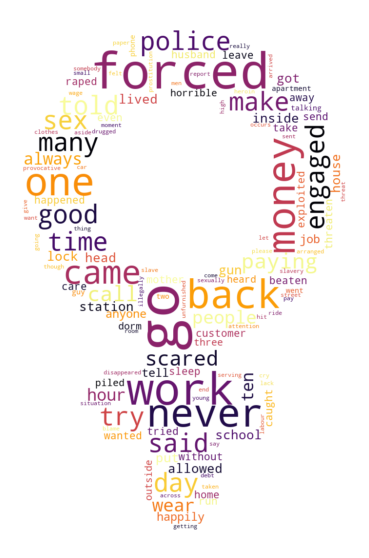

In [158]:
wave_mask = np.array(Image.open( "/Users/paloma/Downloads/feminism2.jpeg"))
 
# Create the wordcloud object
wordcloud = WordCloud(width=3000, height=2400, mask=wave_mask, background_color='white', colormap = 'inferno').generate(news)

# Display the generated image:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.margins(x=0, y=0)
plt.savefig("fsign"+".png", bbox_inches='tight');
plt.show();

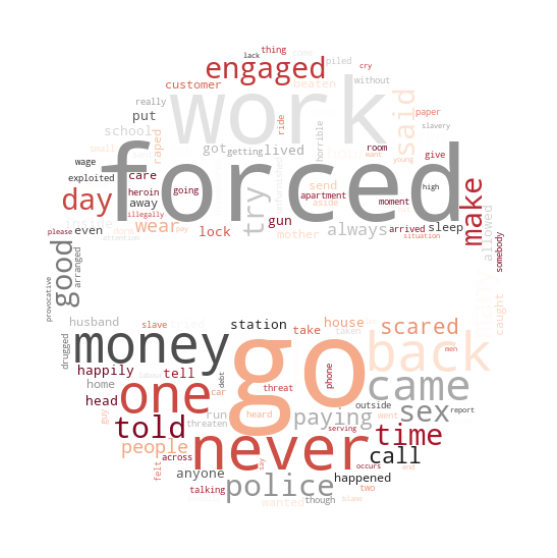

In [185]:
wave_mask = np.array(Image.open( "/Users/paloma/Downloads/noentry.jpeg"))
 
# Create the wordcloud object
wordcloud = WordCloud(width=3000, height=2400, mask=wave_mask, background_color='white', colormap = 'RdGy').generate(news)

# Display the generated image:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.margins(x=0, y=0)
plt.savefig("stop1"+".png", bbox_inches='tight');
plt.show();

In [172]:
new2 = []
for element in the_3:
    new2.append(element)
for element in the_4:
    new2.append(element)
for element in the_5:
    new2.append(element)
for element in the_6:
    new2.append(element)

In [173]:
new3 = ' '.join(new2)

In [169]:
choice = ['put_gun_head',
 'never_got_money',
 'never_came_back',
 'go_police_station',
 'told_could_go',
 'engaged_sex_work',
 'lock_inside_house',
 'one_day_came',
 'try_leave_without_paying_back',
 'threaten_horrible_piled_dorm_three',
 'heard_one_outside_apartment_talking',
 'guy_went_make_phone_call',
 'scared_day_two_people_disappeared',
 'one_sent_money_arranged_come',
 'felt_like_slave_moment_arrived',
 'getting_threat_paying_wage_paper',
 'somebody_would_give_ride_across',
 'small_room_though_unfurnished_aside',
 'going_call_police_really_scared_car',
 'drugged_heroin_thing_taken_forced_wear',
 'wear_sexually_provocative_clothes_forced_prostitution',
 'say_cry_said_please_let_go',
 'always_want_go_always_hit_blame',
 'report_slavery_high_street_forced_labour',
 'illegally_try_work_could_end_situation',
 'ten_hour_work_ten_hour_forced',
 'would_pay_debt_time_serving_men',
 'lack_attention_occurs_young_people_go']
choicetext = ' '.join(choice)

In [176]:
new2

['put_gun_head',
 'never_got_money',
 'allowed_go_school',
 'never_came_back',
 'go_police_station',
 'told_could_go',
 'engaged_sex_work',
 'lock_inside_house',
 'one_day_came',
 'never_lived_happily',
 'could_get_good_job',
 'tell_anyone_happened_even',
 'husband_take_good_care',
 'would_send_back_mother',
 'forced_sleep_many_customer',
 'raped_many_time_beaten',
 'wanted_go_home_said',
 'told_could_make_money',
 'tried_run_away_caught',
 'exploited_engaged_sex_work',
 'try_leave_without_paying_back',
 'threaten_horrible_piled_dorm_three',
 'heard_one_outside_apartment_talking',
 'guy_went_make_phone_call',
 'scared_day_two_people_disappeared',
 'one_sent_money_arranged_come',
 'felt_like_slave_moment_arrived',
 'getting_threat_paying_wage_paper',
 'somebody_would_give_ride_across',
 'small_room_though_unfurnished_aside',
 'going_call_police_really_scared_car',
 'drugged_heroin_thing_taken_forced_wear',
 'wear_sexually_provocative_clothes_forced_prostitution',
 'say_cry_said_please_l

In [170]:
choicetext

'put_gun_head never_got_money never_came_back go_police_station told_could_go engaged_sex_work lock_inside_house one_day_came try_leave_without_paying_back threaten_horrible_piled_dorm_three heard_one_outside_apartment_talking guy_went_make_phone_call scared_day_two_people_disappeared one_sent_money_arranged_come felt_like_slave_moment_arrived getting_threat_paying_wage_paper somebody_would_give_ride_across small_room_though_unfurnished_aside going_call_police_really_scared_car drugged_heroin_thing_taken_forced_wear wear_sexually_provocative_clothes_forced_prostitution say_cry_said_please_let_go always_want_go_always_hit_blame report_slavery_high_street_forced_labour illegally_try_work_could_end_situation ten_hour_work_ten_hour_forced would_pay_debt_time_serving_men lack_attention_occurs_young_people_go'

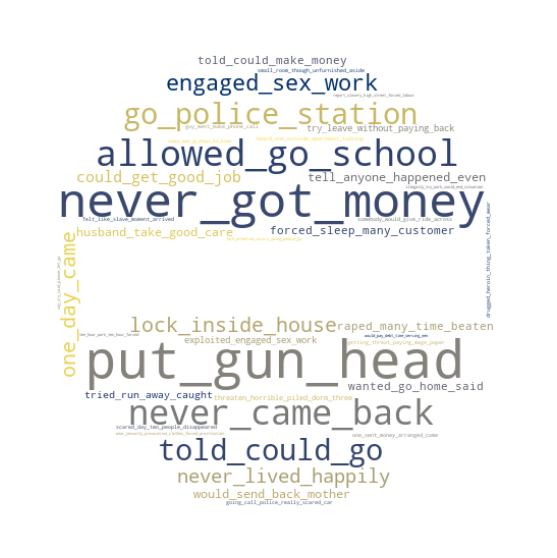

In [184]:
wave_mask = np.array(Image.open("/Users/paloma/Downloads/noentry.jpeg"))
 
# Create the wordcloud object
wordcloud = WordCloud(width=3000, height=2400, mask=wave_mask, background_color='white', colormap = 'cividis').generate(new3)

# Display the generated image:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# plt.margins(x=0, y=0)
plt.savefig("stopsign"+".png", bbox_inches='tight');
plt.show();